### Working on Bing-data gathering / data loading

In [1]:
from pathlib import Path
from fastai2.vision.utils import download_images
from modules.bingutils import search_images_bing
# from fastai2.vision.widgets import *

##### Gather data from bing

In [2]:
!ls ../../other-chess-data/bing-search/

bishop-chess-piece  knight-chess-piece	pawn-chess-piece


In [3]:
key  = 'XXX' # see notes/notes-3.25.txt

In [44]:
# search_term = 'knight chess piece'
# search_term = 'bishop chess piece'
# search_term = 'pawn chess piece'
# search_term = 'rook chess piece'
# search_term = 'queen chess piece'
search_term = 'king chess piece'


In [45]:
results = search_images_bing(key, search_term)
ims = results.attrgot('content_url')
print(f'Got {len(ims)} urls for imgs of "{search_term}"')

Got 149 urls for imgs of "king chess piece"


In [46]:
results_dryrun = results[:3]
results_dryrun

(#3) [<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f9b67bc4950>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f9b67bc4490>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f9b67bc4990>]

In [47]:
search_term_dir = search_term.replace(" ", "-")
search_term_dir

'king-chess-piece'

In [48]:
dest = Path('../../other-chess-data/bing-search/')
dest = dest / search_term_dir

In [49]:
if not dest.exists():
    dest.mkdir()
!ls ../../other-chess-data/bing-search/

bishop-chess-piece  knight-chess-piece	queen-chess-piece
king-chess-piece    pawn-chess-piece	rook-chess-piece


In [50]:
# dry run - to test 3 images
# download_images(dest, urls=results_dryrun.attrgot('content_url'))

In [51]:
download_images(dest, urls=results.attrgot('content_url'))


 Download of https://cdn.wallpapersafari.com/7/61/7z8muE.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p ../../other-chess-data/bing-search/king-chess-piece
$ cd ../../other-chess-data/bing-search/king-chess-piece
$ wget -c https://cdn.wallpapersafari.com/7/61/7z8muE.jpg
$ tar xf 7z8muE.jpg
 And re-run your code once the download is successful



##### Examine the files

In [52]:
from fastai2.data.transforms import get_image_files
from fastai2.vision.utils import verify_images
import warnings
warnings.filterwarnings('ignore')

In [61]:
class_dirs = [  
                'knight-chess-piece',
                'bishop-chess-piece',
                'pawn-chess-piece',
                'rook-chess-piece',
                'queen-chess-piece',
                'king-chess-piece',
                ]

for class_dir in class_dirs:
    fns = Path('../../other-chess-data/bing-search/')
    fns = fns / class_dir
    failed = verify_images(get_image_files(fns))
    print(failed)

(#0) []


(#0) []


(#0) []


(#0) []


(#0) []


(#0) []


In [54]:
import os
import numpy as np
from PIL import Image
from modules.plotutils import plot_many_imgs

In [55]:
class_dirs[5]

'king-chess-piece'

In [58]:
d = Path('../../other-chess-data/bing-search/')
d = d / class_dirs[5]
d

Path('../../other-chess-data/bing-search/king-chess-piece')

In [59]:
N=10
sel_fns = np.random.choice(os.listdir(d),size=N).tolist()
sel_fns = [d / e for e in sel_fns]

imgs = []
for f in sel_fns:
    imgs.append(np.array(Image.open(f)))

len(imgs)

10

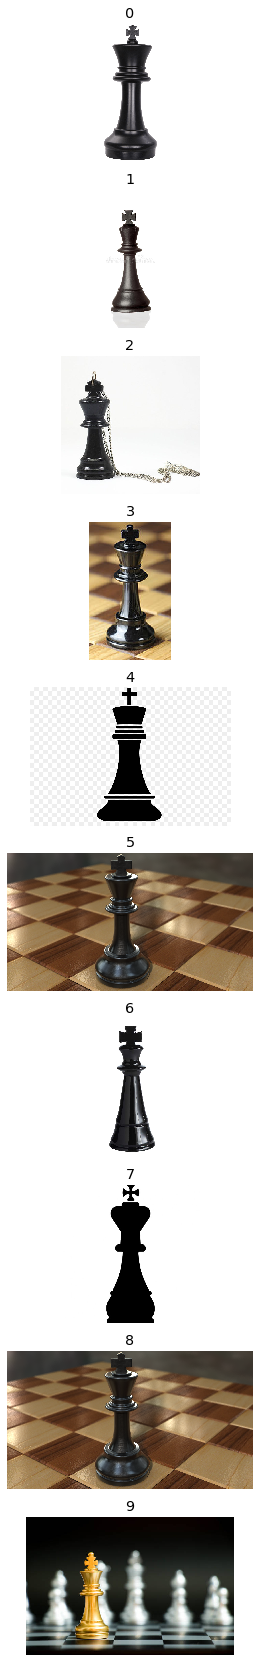

In [60]:
plot_many_imgs(imgs)

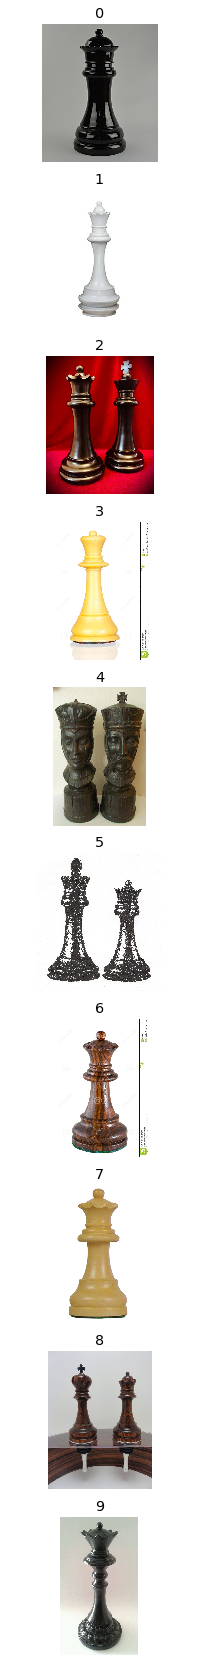

In [43]:
plot_many_imgs(imgs)

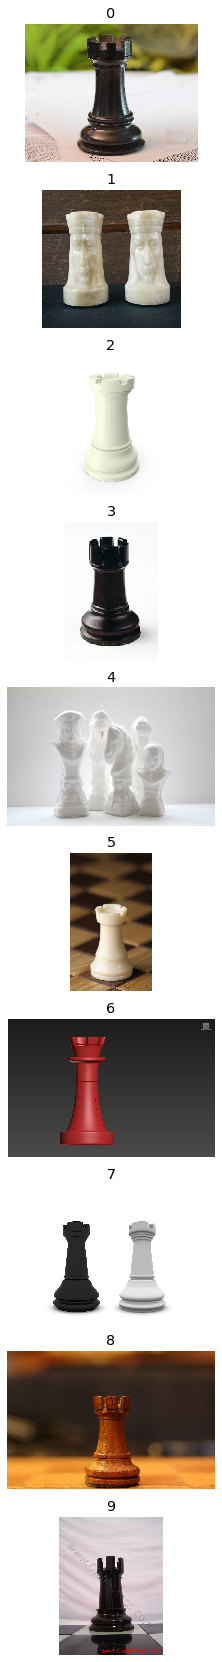

In [24]:
plot_many_imgs(imgs)

In [71]:
%load_ext autoreload
%autoreload 2

In [74]:
# from modules.plotutils import load_many_imgs

In [75]:
from modules.misc import load_many_imgs

In [76]:
d = Path('../../other-chess-data/bing-search/')
d = d / class_dirs[1]
d

Path('../../other-chess-data/bing-search/bishop-chess-piece')

loaded 10 images


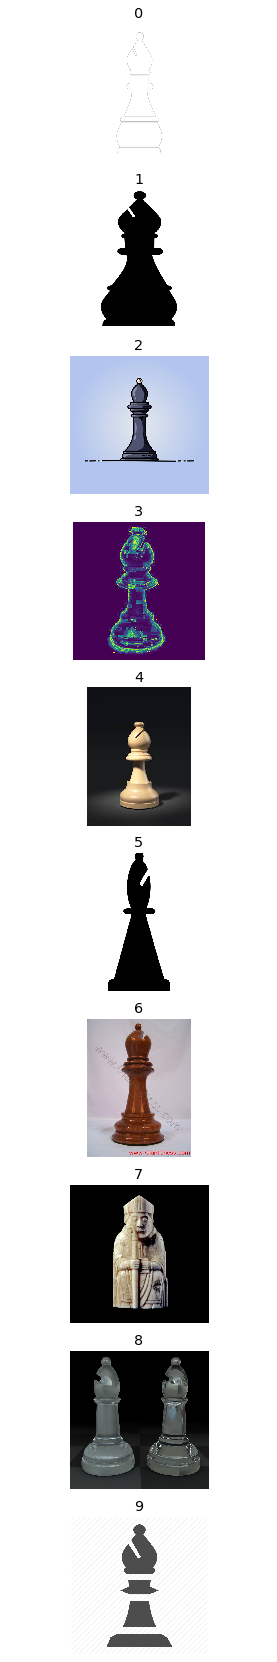

In [77]:
plot_many_imgs(  load_many_imgs(d))

In [78]:
d = Path('../../other-chess-data/bing-search/')
d = d / class_dirs[2]
d

Path('../../other-chess-data/bing-search/pawn-chess-piece')

loaded 10 images


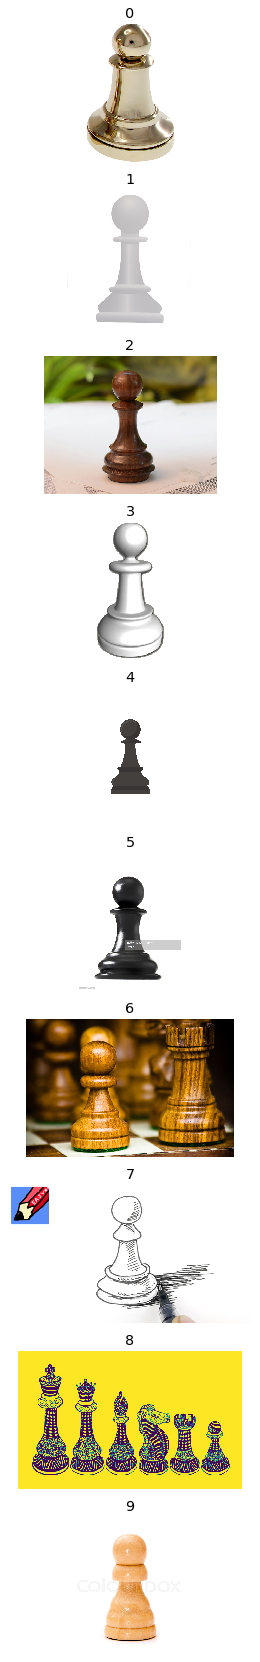

In [81]:
plot_many_imgs( load_many_imgs(d))